# UTS

# **Data Undestanding**



### **1.Pengumpulan Data**

In [30]:

import pandas as pd
df = pd.read_csv('cirrhosis.csv')
df.head()


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


### **2.Sampling**

In [31]:
# Ukuran data
print(f"Jumlah total data: {len(df)}")

# Ambil sampel acak 10%
df_sample = df.sample(frac=0.1, random_state=42)
df_sample.head()


Jumlah total data: 418


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
321,322,2011,D,NaN,23376,F,NaN,NaN,NaN,N,1.1,NaN,3.69,NaN,NaN,NaN,NaN,139.0,10.5,NaN
324,325,4795,C,NaN,12419,F,NaN,NaN,NaN,N,1.8,NaN,3.24,NaN,NaN,NaN,NaN,NaN,18.0,2.0
388,389,1581,C,NaN,24472,F,NaN,NaN,NaN,N,0.7,NaN,3.06,NaN,NaN,NaN,NaN,165.0,10.0,4.0
56,57,3282,D,D-penicillamine,19567,F,N,Y,N,S,2.3,260.0,3.18,231.0,11320.2,105.78,94.0,216.0,12.4,3.0
153,154,140,D,D-penicillamine,25340,M,N,N,Y,Y,2.4,168.0,2.56,225.0,1056.0,120.90,75.0,108.0,14.1,3.0


### **3.Profiling Data**

3.1

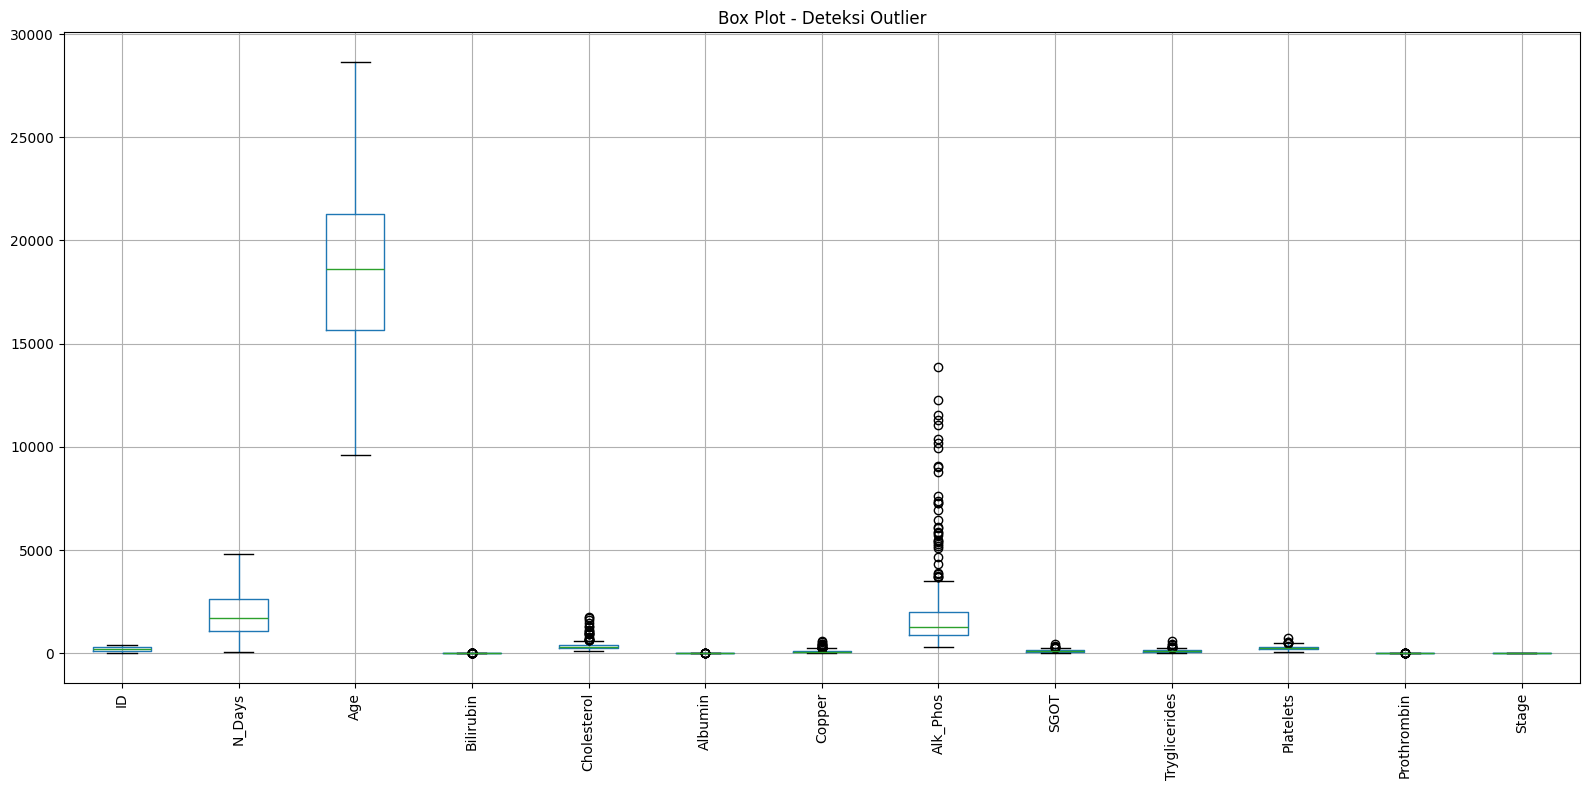

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ambil kolom numerik aja
numeric_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(16, 8))
df[numeric_cols].boxplot(rot=90)
plt.title("Box Plot - Deteksi Outlier")
plt.grid(True)
plt.tight_layout()
plt.show()


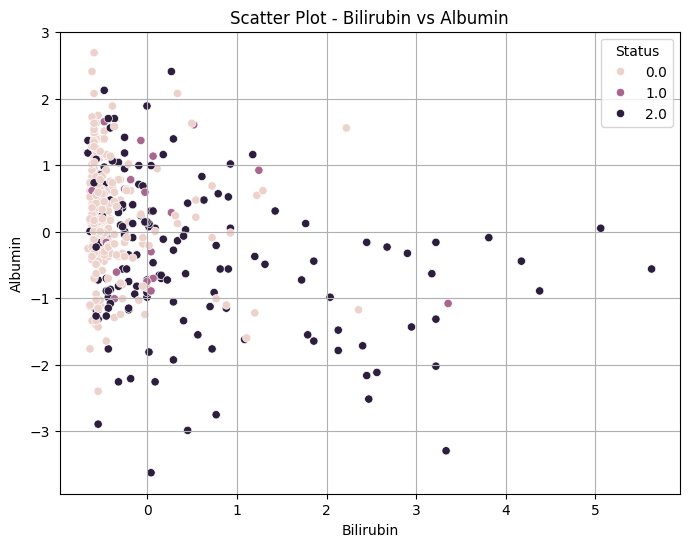

In [54]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_cleaned['Bilirubin'], y=X_cleaned['Albumin'], hue=y_cleaned)
plt.title("Scatter Plot - Bilirubin vs Albumin")
plt.xlabel("Bilirubin")
plt.ylabel("Albumin")
plt.grid(True)
plt.show()


In [32]:
# Info data
df.info()

# Statistik deskriptif
df.describe(include='all')

# Cek missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

### **4.Korelasi dan Asosiasi**

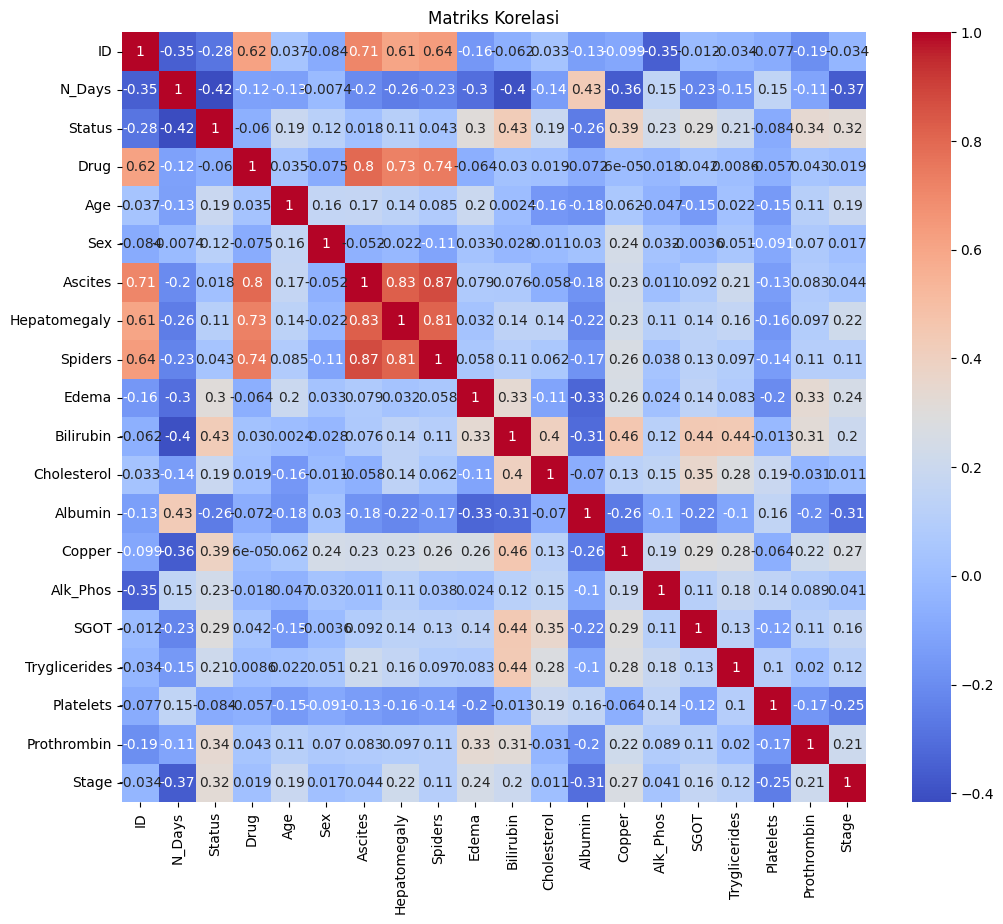

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Label encoding untuk korelasi numerik
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

# Korelasi
plt.figure(figsize=(12,10))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()


### **5.Ekplorasi data**

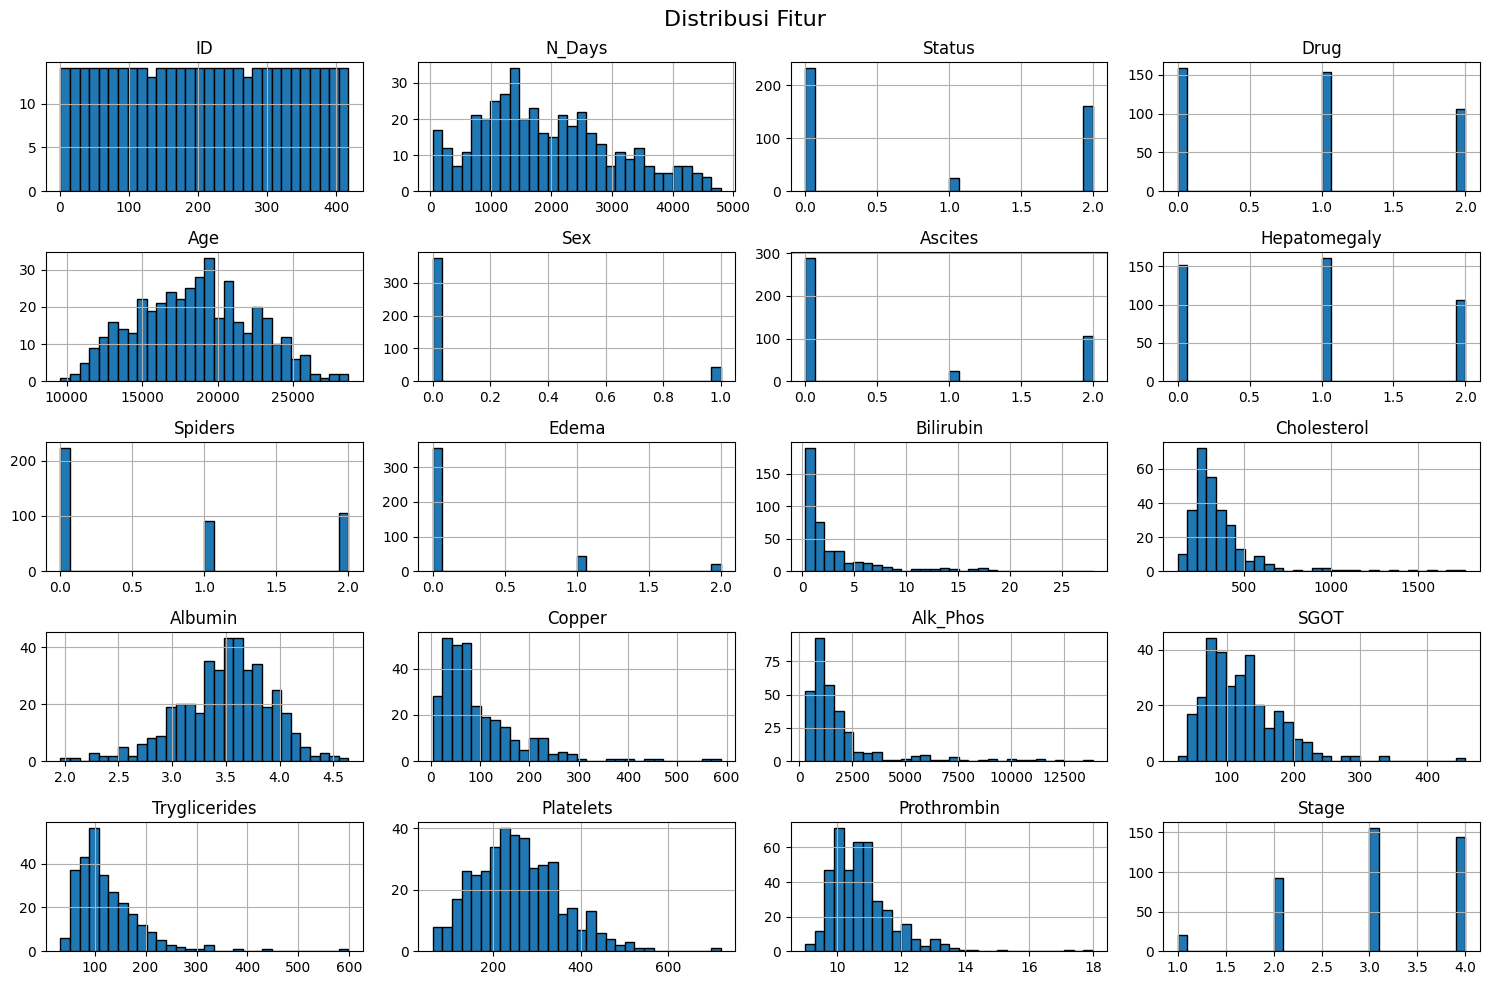

In [34]:
# Histogram fitur numerik
df_encoded.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle("Distribusi Fitur", fontsize=16)
plt.tight_layout()
plt.show()


### **6.Identifikasi Masalah**

In [35]:
# Cek duplikat
print("Jumlah duplikat:", df.duplicated().sum())

# Cek missing value per kolom
print("\nMissing values per kolom:\n", df.isnull().sum())

# Cek jumlah kategori (untuk imbalance class)
print("\nDistribusi Target (Status):\n", df['Status'].value_counts())


Jumlah duplikat: 0

Missing values per kolom:
 ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

Distribusi Target (Status):
 Status
C     232
D     161
CL     25
Name: count, dtype: int64


### **7.Validasi Data**

In [36]:
# Validasi tipe data dan range nilai
print("\nTipe data setiap kolom:")
print(df.dtypes)

# Contoh range usia (valid?)
print("\nRentang nilai usia:", df['Age'].min(), "sampai", df['Age'].max())



Tipe data setiap kolom:
ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

Rentang nilai usia: 9598 sampai 28650


# **Pre Processing**

### **1.Menangani Missing Values**

In [37]:
from sklearn.impute import SimpleImputer

# Lakukan imputasi rata-rata untuk kolom numerik
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)

# Cek lagi missing value
print("Sisa missing values setelah imputasi:\n", df_imputed.isnull().sum().sum())


Sisa missing values setelah imputasi:
 0


### **2.Normalisasi Data**

In [38]:
from sklearn.preprocessing import StandardScaler

# Simpan dulu kolom target
y = df_imputed['Status']
X = df_imputed.drop(columns=['Status'])

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


### **3.Deteksi outlier**

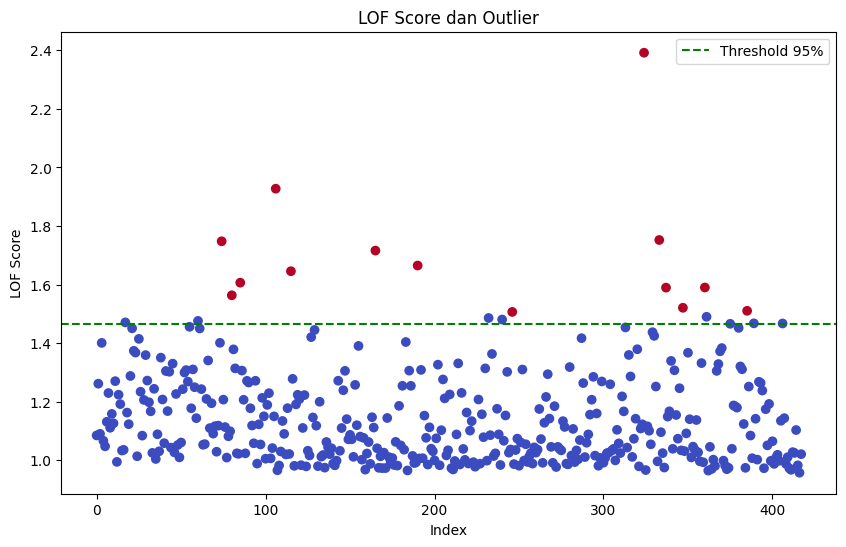

In [39]:
import numpy as np

from sklearn.neighbors import LocalOutlierFactor

# Terapkan LOF
lof = LocalOutlierFactor(n_neighbors=20)
y_lof = lof.fit_predict(X_scaled)
lof_scores = -lof.negative_outlier_factor_

# Tambahkan kolom skor LOF dan label outlier
X_scaled['LOF_Score'] = lof_scores
X_scaled['Outlier'] = (y_lof == -1).astype(int)

# Visualisasi
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled.index, X_scaled['LOF_Score'], c=X_scaled['Outlier'], cmap='coolwarm')
plt.axhline(y=np.percentile(lof_scores, 95), color='green', linestyle='--', label='Threshold 95%')
plt.title("LOF Score dan Outlier")
plt.xlabel("Index")
plt.ylabel("LOF Score")
plt.legend()
plt.show()


### **4.Menghapus Outlier**

In [40]:
# Hapus outlier
X_cleaned = X_scaled[X_scaled['Outlier'] == 0].drop(columns=['LOF_Score', 'Outlier']).reset_index(drop=True)
y_cleaned = y[X_scaled['Outlier'] == 0].reset_index(drop=True)

print(f"Jumlah data setelah hapus outlier: {len(X_cleaned)}")


Jumlah data setelah hapus outlier: 404


# **3.Klasifikasi**

In [41]:
# 1. Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [42]:

import pandas as pd
df = pd.read_csv('cirrhosis.csv')
df.head()


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [43]:
# 3. Cek Data Awal
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [45]:
# 6. Split Data
from sklearn.model_selection import train_test_split
X = df.drop(columns=["Status"])
y = df["Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
# Pastikan target y dalam bentuk numerik
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df["Status"])  # encode target


In [47]:
# Split data bersih (tanpa outlier)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Definisi model
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),

}

# Training & Evaluasi
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f" Model: {name}")
    print(f" Akurasi: {acc:.2f}")
    print(" Classification Report:")
    print(classification_report(y_test, y_pred))
    print("="*50)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, zero_division=0))



 Model: Logistic Regression
 Akurasi: 0.84
 Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89        45
         1.0       0.25      0.25      0.25         4
         2.0       0.87      0.81      0.84        32

    accuracy                           0.84        81
   macro avg       0.66      0.66      0.66        81
weighted avg       0.84      0.84      0.84        81

 Model: Decision Tree
 Akurasi: 0.64
 Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.69      0.70        45
         1.0       0.20      0.25      0.22         4
         2.0       0.61      0.62      0.62        32

    accuracy                           0.64        81
   macro avg       0.51      0.52      0.51        81
weighted avg       0.65      0.64      0.65        81

              precision    recall  f1-score   support

         0.0       0.72      0.69      0.70        45
 

In [48]:
# Import library yang dibutuhin
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split data hasil preprocessing & tanpa outlier
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Inisialisasi model KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # kamu bisa coba 3, 7, 9 juga nanti

# Training model
knn_model.fit(X_train, y_train)

# Prediksi data test
y_pred = knn_model.predict(X_test)

# Evaluasi performa model
acc = accuracy_score(y_test, y_pred)
print("Model: K-Nearest Neighbors (KNN)")
print(f"Akurasi: {acc:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


Model: K-Nearest Neighbors (KNN)
Akurasi: 0.80
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85        45
         1.0       0.00      0.00      0.00         4
         2.0       0.85      0.72      0.78        32

    accuracy                           0.80        81
   macro avg       0.54      0.55      0.54        81
weighted avg       0.77      0.80      0.78        81



In [49]:
# Import library
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split data hasil preprocessing & tanpa outlier
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training model
rf_model.fit(X_train, y_train)

# Prediksi data test
y_pred = rf_model.predict(X_test)

# Evaluasi performa model
acc = accuracy_score(y_test, y_pred)
print("📌 Model: Random Forest")
print(f"✅ Akurasi: {acc:.2f}")
print("🧾 Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


📌 Model: Random Forest
✅ Akurasi: 0.83
🧾 Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86        45
         1.0       0.00      0.00      0.00         4
         2.0       0.84      0.81      0.83        32

    accuracy                           0.83        81
   macro avg       0.55      0.57      0.56        81
weighted avg       0.79      0.83      0.81        81



In [50]:
# Import library
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split data hasil preprocessing & tanpa outlier
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training model
rf_model.fit(X_train, y_train)

# Prediksi data test
y_pred = rf_model.predict(X_test)

# Evaluasi performa model
acc = accuracy_score(y_test, y_pred)
print("📌 Model: Random Forest")
print(f"✅ Akurasi: {acc:.2f}")
print("🧾 Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


📌 Model: Random Forest
✅ Akurasi: 0.83
🧾 Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86        45
         1.0       0.00      0.00      0.00         4
         2.0       0.84      0.81      0.83        32

    accuracy                           0.83        81
   macro avg       0.55      0.57      0.56        81
weighted avg       0.79      0.83      0.81        81

